In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving Fake.csv to Fake.csv


Saving True.csv to True (1).csv


In [ ]:
import pandas as pd
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')
fake_df['label'] = 0
true_df['label'] = 1
df = pd.concat([fake_df, true_df])
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,title,text,subject,date,label
0,Storm-battered Antigua asks U.S. to settle 12-...,GENEVA (Reuters) - Antigua and Barbuda asked t...,worldnews,"September 29, 2017",1
1,White House optimistic Congress will avoid gov...,WASHINGTON (Reuters) - White House legislative...,politicsNews,"December 18, 2017",1
2,THOUGHT POLICE: US Border Control Wants to Stu...,Patrick Henningsen 21st Century WireIf this la...,US_News,"June 29, 2016",0
3,Syria's Assad calls U.S.-backed militias 'trai...,BEIRUT (Reuters) - Syrian President Bashar al-...,worldnews,"December 18, 2017",1
4,Watch Ted Cruz’s Disturbing Reaction When Car...,Carly Fiorina has decided to add her face to t...,News,"May 2, 2016",0


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
  text = text.lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\. \S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[^a-zA-Z]', ' ',text)
  text = re.sub(r'\n', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text
  df['text'] = df['text'].apply(clean_text)
  stop_words = set(stopwords.words('english'))
  df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
  df['text'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = re.sub(r'\s+', ' ',text).strip()
  words = [w for w in text.split() if w not in stopwords.words('english')]
  return " ".join(words)
  df['text'] = df['text'].apply(clean_text)
  df['title']=df['title'].apply(clean_text)
  df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
df['content'] = df['title'] + " " +df['text']
x=df['content']
y=df['label']
vectorizer = TfidfVectorizer(max_features=5000)
x_vec = vectorizer.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42)




In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Model Accuracy: 99.49%
Confusion Matrix:
 [[4668   21]
 [  25 4266]]


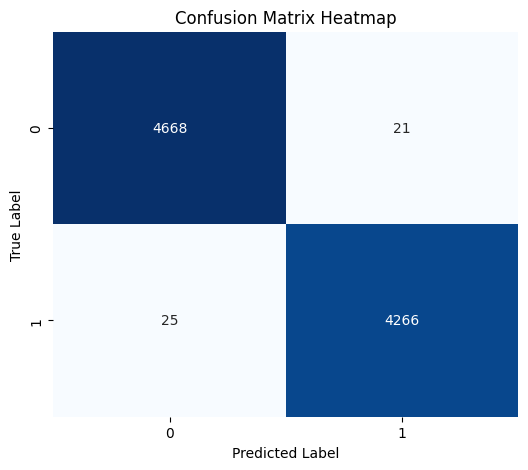

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()